# A tutorial of process of data analysis and machine learning
Followed [example-data-science-notebook](http://nbviewer.jupyter.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb).

Replaced some class and method usage with latest version of scikit-learn, i.e. some classes in ***cross_validation*** package are deprecated, used ***model_selection package*** instead.

In [64]:
%matplotlib inline
from __future__ import print_function, division, unicode_literals
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

# data set
Original data set: [Iris data set](https://archive.ics.uci.edu/ml/datasets/Iris).
If you want to try cleaning the data first, use [modified Iris data set](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/raw/master/example-data-science-notebook/iris-data.csv).

the process below used original data set, therefore skipped data cleaning step.

In [3]:
data = pd.read_csv('iris.data', header=None, names=['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','class'])
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


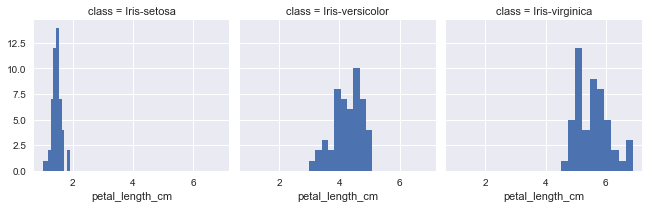

In [5]:
g = sns.FacetGrid(data, col='class')
g.map(plt.hist, 'petal_length_cm')

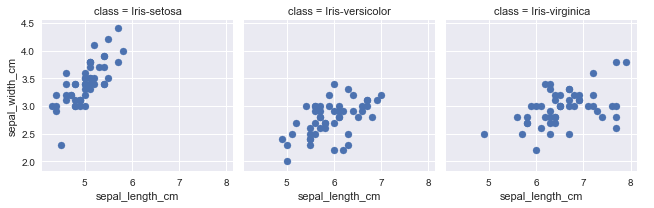

In [6]:
g = sns.FacetGrid(data, col='class')
g.map(plt.scatter, 'sepal_length_cm', 'sepal_width_cm')
g.add_legend()

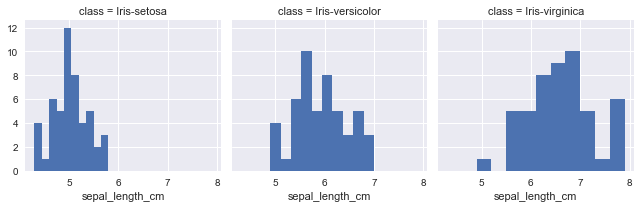

In [7]:
g = sns.FacetGrid(data, col='class')
g.map(plt.hist, 'sepal_length_cm')

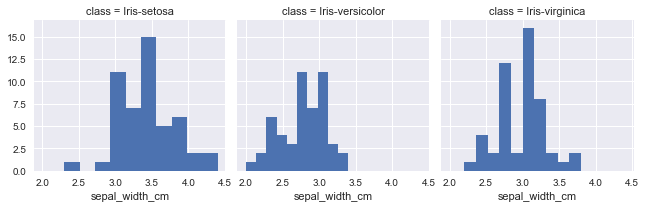

In [8]:
g = sns.FacetGrid(data, col='class')
g.map(plt.hist, 'sepal_width_cm')

# Tidy Data (skipped for this test since it's tidied)

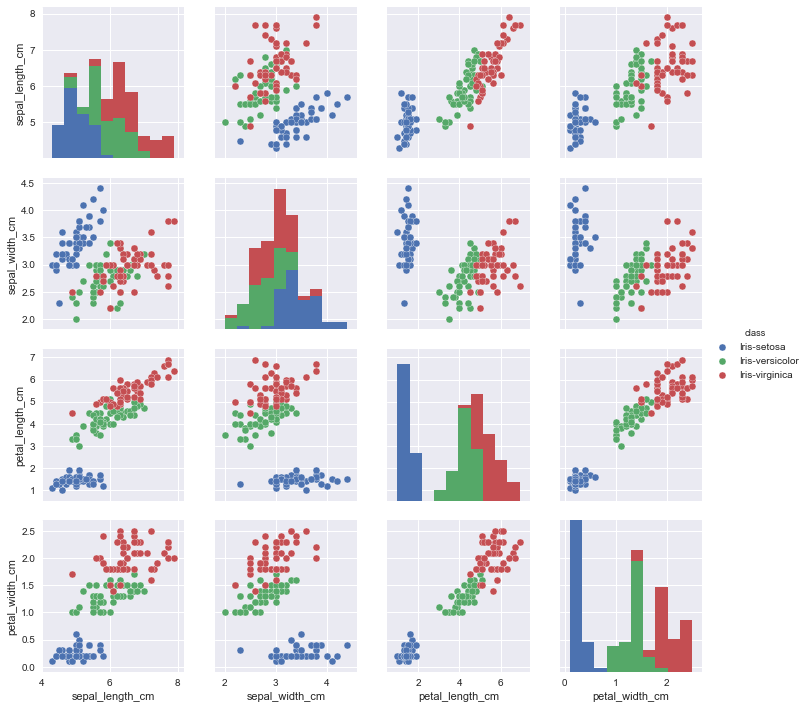

In [9]:
sns.pairplot(data, hue='class')

In [11]:
data.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


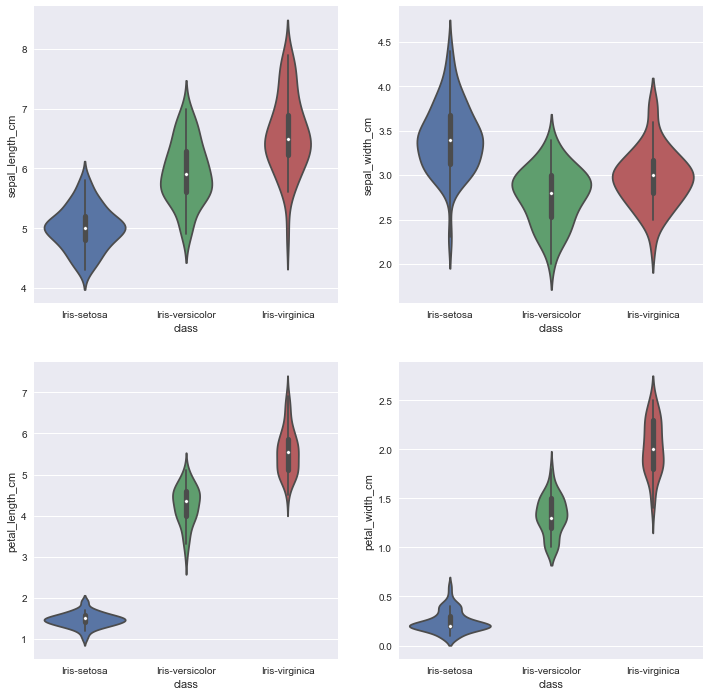

In [10]:
plt.figure(figsize=(12,12))
for i, col_name in enumerate(data.columns):
    if col_name=='class':
        continue
    plt.subplot(2,2,i+1)
    sns.violinplot(x='class', y=col_name, data=data)

# Build Model

In [50]:
import sklearn
from sklearn.model_selection import train_test_split

In [23]:
all_x = data.ix[:,:-1].values
all_y = data['class'].values

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(all_x, all_y, train_size=0.75)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [45]:
dtc.fit(xtrain, ytrain)
dtc.score(xtest, ytest)

0.94736842105263153

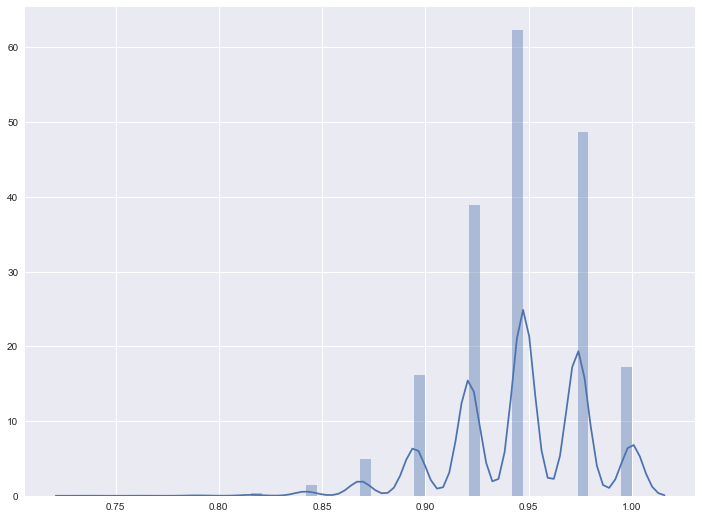

In [48]:
model_accuracies = []
for repetition in range(10000):
    xtrain, xtest, ytrain, ytest = train_test_split(all_x, all_y, train_size=0.75)
    dtc.fit(xtrain, ytrain)
    model_accuracies.append(dtc.score(xtest, ytest))
plt.figure(figsize=(12,9))
sns.distplot(model_accuracies)

# K-Fold Cross-Validation

In [51]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

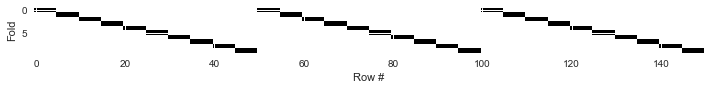

In [65]:
def kfold_plot(data, n):
    masks=[]
    for train, test in data:
        mask = np.zeros(n, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(12,12))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

skf = StratifiedKFold(10)
# kfold_plot(skf.get_n_splits(all_x, all_y), len(all_y))
kfold_plot(skf.split(all_x, all_y), len(all_y))

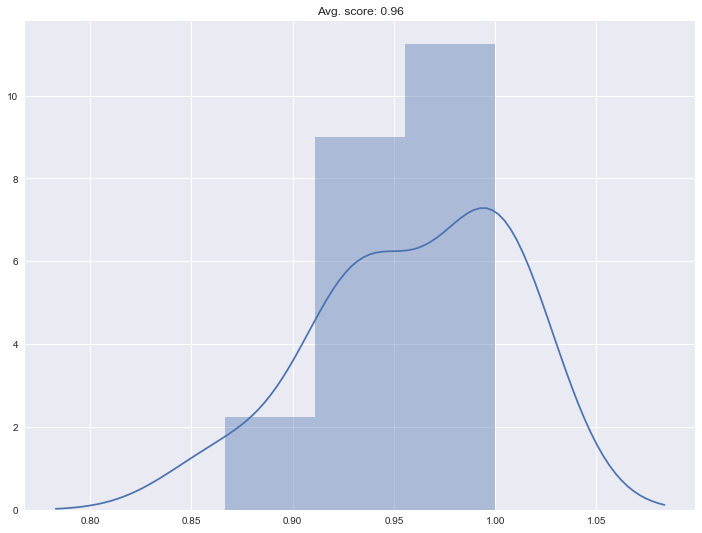

In [68]:
from sklearn.model_selection import cross_val_score
dtc2 = DecisionTreeClassifier()
cv_scores = cross_val_score(dtc2, all_x, all_y, cv=10)
plt.figure(figsize=(12,9))
plt.title('Avg. score: {}'.format(np.mean(cv_scores)))
sns.distplot(cv_scores)

# Model parameters tuning by Grid Search

In [141]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': np.arange(1,6),
    'max_features': np.arange(1,5) # = max of the features, columns in training set
}
# cv_set = StratifiedKFold(10).split(all_x, all_y)
gs = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10)
gs.fit(xtrain, ytrain)

print("Best parameters set found on development set:")
print(gs.best_params_)
print()
print("Grid scores on development set:")
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("{:.3f} (+/-{:.3f}) for {}".format(mean, std * 2, params))

Best parameters set found on development set:
{u'max_features': 4, u'max_depth': 4}

Grid scores on development set:
0.625 (+/-0.175) for {u'max_features': 1, u'max_depth': 1}
0.670 (+/-0.033) for {u'max_features': 2, u'max_depth': 1}
0.670 (+/-0.033) for {u'max_features': 3, u'max_depth': 1}
0.670 (+/-0.033) for {u'max_features': 4, u'max_depth': 1}
0.705 (+/-0.275) for {u'max_features': 1, u'max_depth': 2}
0.902 (+/-0.235) for {u'max_features': 2, u'max_depth': 2}
0.929 (+/-0.107) for {u'max_features': 3, u'max_depth': 2}
0.920 (+/-0.091) for {u'max_features': 4, u'max_depth': 2}
0.902 (+/-0.168) for {u'max_features': 1, u'max_depth': 3}
0.920 (+/-0.120) for {u'max_features': 2, u'max_depth': 3}
0.946 (+/-0.114) for {u'max_features': 3, u'max_depth': 3}
0.955 (+/-0.116) for {u'max_features': 4, u'max_depth': 3}
0.884 (+/-0.214) for {u'max_features': 1, u'max_depth': 4}
0.955 (+/-0.092) for {u'max_features': 2, u'max_depth': 4}
0.964 (+/-0.088) for {u'max_features': 3, u'max_depth': 4

[[0.625, 0.6696428571428571, 0.6696428571428571, 0.6696428571428571], [0.7053571428571429, 0.9017857142857143, 0.9285714285714286, 0.9196428571428571], [0.9017857142857143, 0.9196428571428571, 0.9464285714285714, 0.9553571428571429], [0.8839285714285714, 0.9553571428571429, 0.9642857142857143, 0.9732142857142857], [0.8660714285714286, 0.9642857142857143, 0.9642857142857143, 0.9732142857142857]]


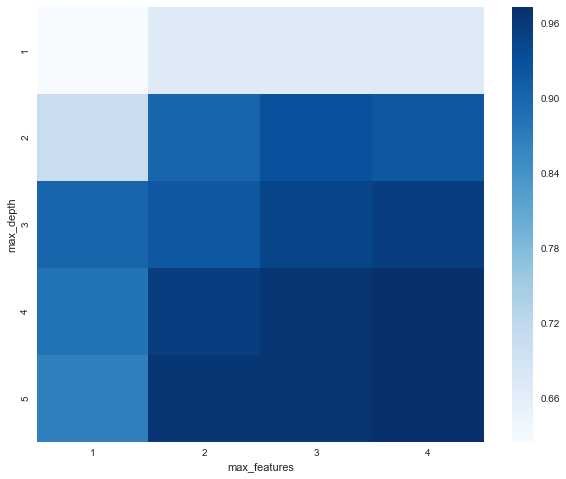

In [148]:
grid_visualization = [[0 for x in range(4)] for y in range(5)]
for i, v in enumerate( gs.cv_results_['params']):
    grid_visualization[v['max_depth']-1][v['max_features']-1] = gs.cv_results_['mean_test_score'][i]

print(grid_visualization)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
plt.figure(figsize=(10,8))
sns.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, gs.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, gs.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [130]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(gs.best_estimator_, out_file=out_file)

<img src="iris_dtc.png" />

## Try Random forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(10)

grid_search = GridSearchCV(rfc,
                           param_grid=parameter_grid,
                           cv=cross_validation.split(all_x,all_y))

grid_search.fit(all_x, all_y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.973333333333
Best parameters: {u'max_features': 4, u'n_estimators': 5, u'criterion': u'gini', u'warm_start': False}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion=u'gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)